In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import *

## Wide and Deep Model Architechture

In [76]:
input_w = layers.Input(shape=(1,1), name='wide_input')
input_d = layers.Input(shape=(1,1), name='deep_input')

In [77]:
hidden1 = layers.Dense(10, activation='relu', name='dense_1')(input_d)
hidden2 = layers.Dense(10, activation='relu', name='dense_2')(hidden1)
concat = layers.concatenate([input_w, hidden2], name="concatenate")

aux_out = layers.Dense(10, name='aux_output')(hidden2)
main_out = layers.Dense(1, activation='sigmoid', name='main_output')(concat)

In [78]:
model = models.Model(inputs=[input_w, input_d], outputs=[main_out, aux_out])

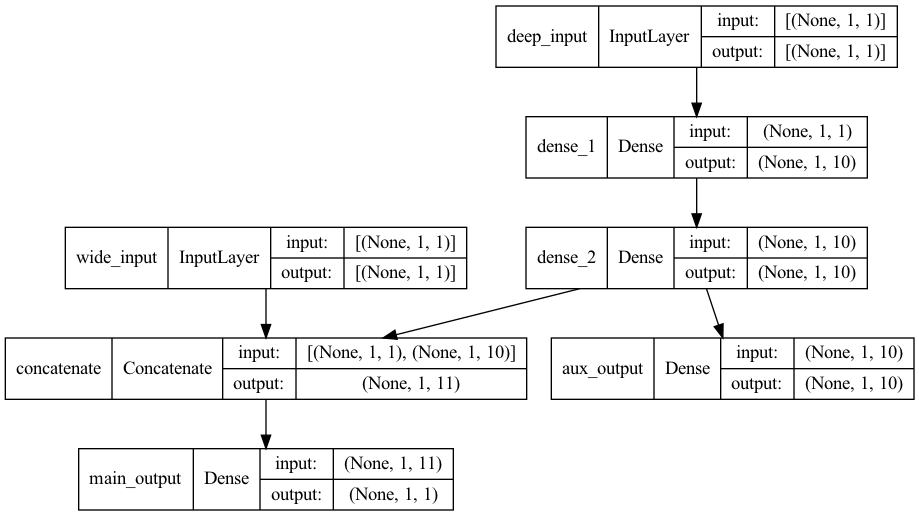

In [79]:
utils.plot_model(model, show_shapes=True)

In [80]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 1, 1)]       0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 1, 10)        20          ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 1, 1)]       0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 1, 10)        110         ['dense_1[0][0]']                
                                                                                            

## Implement Model as Class

This can be done by subclassing ```tf.keras.models.Model``` class. At least two methods ```__init__()``` and ```call()```  must be defined. Optionally, ```build()``` can also be defined.

In [81]:
class WideDeepModel(models.Model):
    def __init__(self, units=10, input_shape=[(1, 1), (1, 1)], **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = layers.Dense(units, activation='relu', name='dense_1')
        self.hidden2 = layers.Dense(units, activation='relu', name='dense_2')
        self.main_out = layers.Dense(1, activation='sigmoid', name='main_output')
        self.aux_out = layers.Dense(units, name='aux_output')
        self.build(input_shape)  
    
    def build(self, input_shape):
        super().build(input_shape)
        shape_w, shape_d = input_shape
        input_w = layers.Input(shape=shape_w, name='wide_input')
        input_d = layers.Input(shape=shape_d, name='deep_input')
        self.call([input_w, input_d])

    def call(self, inputs):
        input_w, input_d = inputs
        hidden1 = self.hidden1(input_d)
        hidden2 = self.hidden2(hidden1)
        aux_out = self.aux_out(hidden2)
        concat = layers.concatenate([input_w, hidden2])
        main_out = self.main_out(concat)
        return main_out, aux_out

In [73]:
model = WideDeepModel()

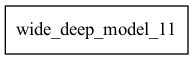

In [74]:
utils.plot_model(model, show_shapes=True)

In [75]:
model.summary()

Model: "wide_deep_model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1, 10)             20        
                                                                 
 dense_2 (Dense)             (None, 1, 10)             110       
                                                                 
 main_output (Dense)         (None, 1, 1)              12        
                                                                 
 aux_output (Dense)          (None, 1, 10)             110       
                                                                 
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________
